IMPORTING MODULES

In [1]:
import torch
from torch import nn

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from helper_functions import plot_decision_boundary

import matplotlib.pyplot as plt

HYPERPARAMETERS

In [2]:
LERNING_RATE = 0.1
EPOCHS = 2000
INPUT_SHAPE = 2
HIDDEN_UNITS = 10
OUTPUT_SHAPE = 1
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

CREATING DATA

In [3]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
                    noise=0.03)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

VISUALIZING DATA

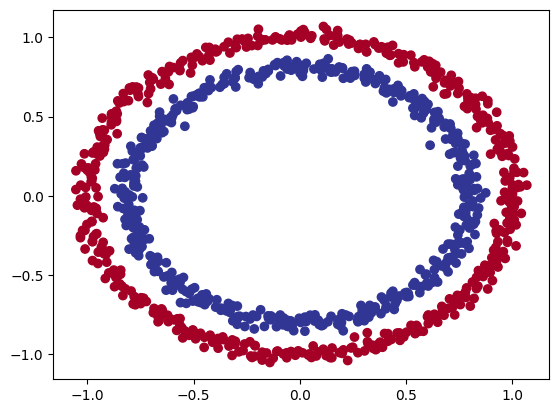

In [4]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

CREATING A MODEL

In [5]:
class CircleModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)
    
model = CircleModel(INPUT_SHAPE, HIDDEN_UNITS, OUTPUT_SHAPE).to(DEVICE)
model.state_dict()
        

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.1287, -0.3096],
                      [ 0.3597,  0.5282],
                      [-0.5537,  0.4299],
                      [ 0.6215,  0.3906],
                      [-0.5461, -0.6497],
                      [-0.0818, -0.4808],
                      [ 0.4401, -0.4785],
                      [-0.2520,  0.2651],
                      [-0.0518,  0.4875],
                      [ 0.4923, -0.2641]])),
             ('layer_stack.0.bias',
              tensor([-0.5006, -0.2937,  0.6707, -0.5993,  0.6687, -0.3831,  0.6323,  0.3771,
                       0.2740,  0.2873])),
             ('layer_stack.2.weight',
              tensor([[-0.0564, -0.2859, -0.1011,  0.2685, -0.0142, -0.2236, -0.2524, -0.1758,
                        0.0373,  0.1855],
                      [ 0.0513, -0.2268,  0.1652,  0.2429,  0.0069, -0.1643, -0.0896, -0.1759,
                        0.1940, -0.1155],
                      [-0.0782, -0.2539, -0.3072,  0.3

TEST-TEST LOOP

In [6]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=LERNING_RATE)


for epoch in range(1, EPOCHS + 1):
    # TRAINING
    model.train()

    #1 Forward pass
    train_logits = model(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    #2 Calculate loss
    train_loss = loss_fn(train_logits, y_train)

    #3 Optimizer zero grad
    optimizer.zero_grad()

    #4 Loss backward
    train_loss.backward()

    #5 Optimizer step
    optimizer.step()

    # TESTING
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.2f} | Test loss: {test_loss:.2f}")


Epoch: 100 | Train Loss: 0.69 | Test loss: 0.76
Epoch: 200 | Train Loss: 0.69 | Test loss: 0.76
Epoch: 300 | Train Loss: 0.69 | Test loss: 0.76
Epoch: 400 | Train Loss: 0.68 | Test loss: 0.76
Epoch: 500 | Train Loss: 0.68 | Test loss: 0.75
Epoch: 600 | Train Loss: 0.67 | Test loss: 0.70
Epoch: 700 | Train Loss: 0.66 | Test loss: 0.68
Epoch: 800 | Train Loss: 0.65 | Test loss: 0.65
Epoch: 900 | Train Loss: 0.62 | Test loss: 0.61
Epoch: 1000 | Train Loss: 0.59 | Test loss: 0.55
Epoch: 1100 | Train Loss: 0.52 | Test loss: 0.52
Epoch: 1200 | Train Loss: 0.42 | Test loss: 0.52
Epoch: 1300 | Train Loss: 0.29 | Test loss: 0.52
Epoch: 1400 | Train Loss: 0.19 | Test loss: 0.52
Epoch: 1500 | Train Loss: 0.12 | Test loss: 0.52
Epoch: 1600 | Train Loss: 0.08 | Test loss: 0.52
Epoch: 1700 | Train Loss: 0.06 | Test loss: 0.52
Epoch: 1800 | Train Loss: 0.05 | Test loss: 0.52
Epoch: 1900 | Train Loss: 0.04 | Test loss: 0.52
Epoch: 2000 | Train Loss: 0.03 | Test loss: 0.52


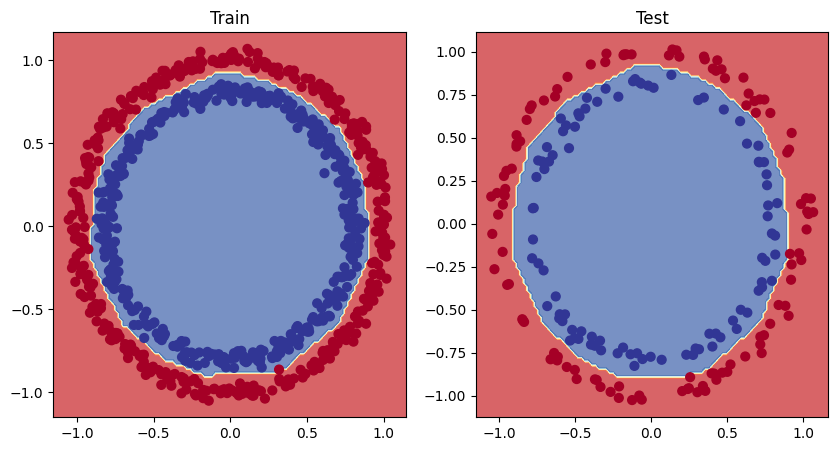

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)